# 타이타닉 생존자 예측하기

# 데이터 읽고 전체 상황 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


* pclass: 탑승한 선실의 등급으로 1등실이 가장 좋고, 3등실이 가장 저렴한 객실
* survived: 생존여부로 1이면 생존, 0이면 미생존
* age: 나이
* sibsp: 함께 탑승한 형제자매나 배우자의 수
* parch: 함께 탐승한 부모나 자녀의 수
* fare : 탑승 당시 요금

In [4]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 데이터 개요를 그래프로 확인하기

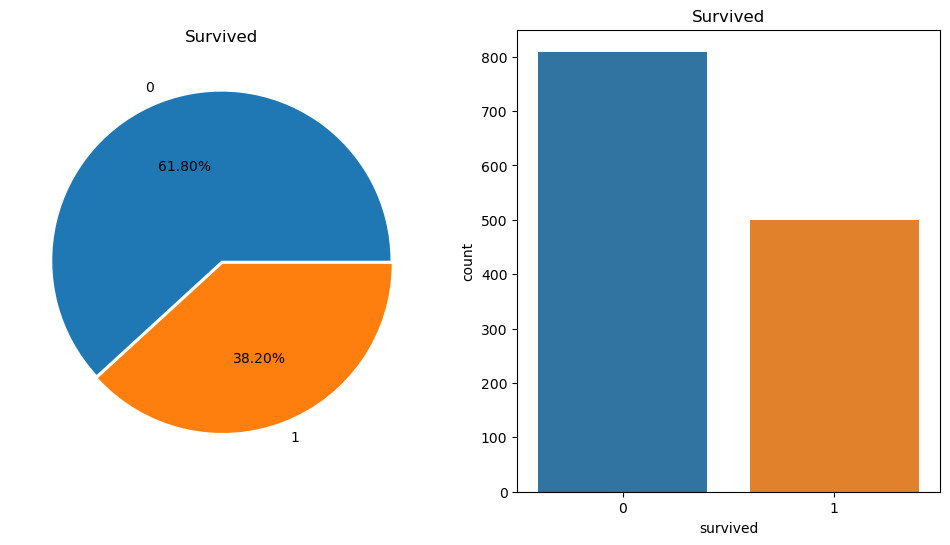

In [5]:
#pie, countplot를 이용해서 생존자 %, 수치 그래프로 확인
f, ax = plt.subplots(1, 2, figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.02], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#sns.countplot(x=raw_data['survived'], ax=ax[1])
sns.countplot(data=raw_data, x='survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot: >

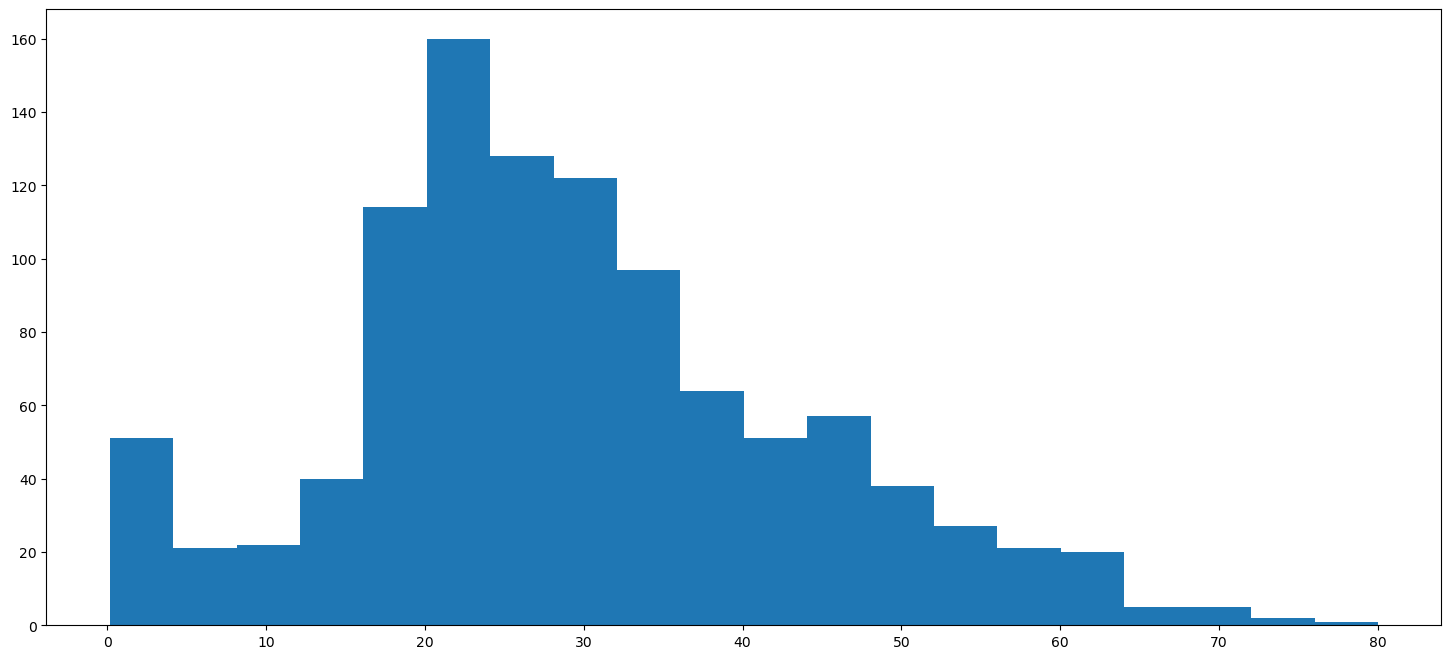

In [6]:
# age 항목을 hist(히스토그램)으로 표시(bins: 막대수)
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False)


* 80/20 = 4 각 막대의 나이는 4살 간격
* 0~4세 아기들의 수가 다른 어린이들에 비해 많았다.

In [7]:
# pclass를 index로 해서 데이터의 평균값 표시
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [8]:
# 상관계수
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


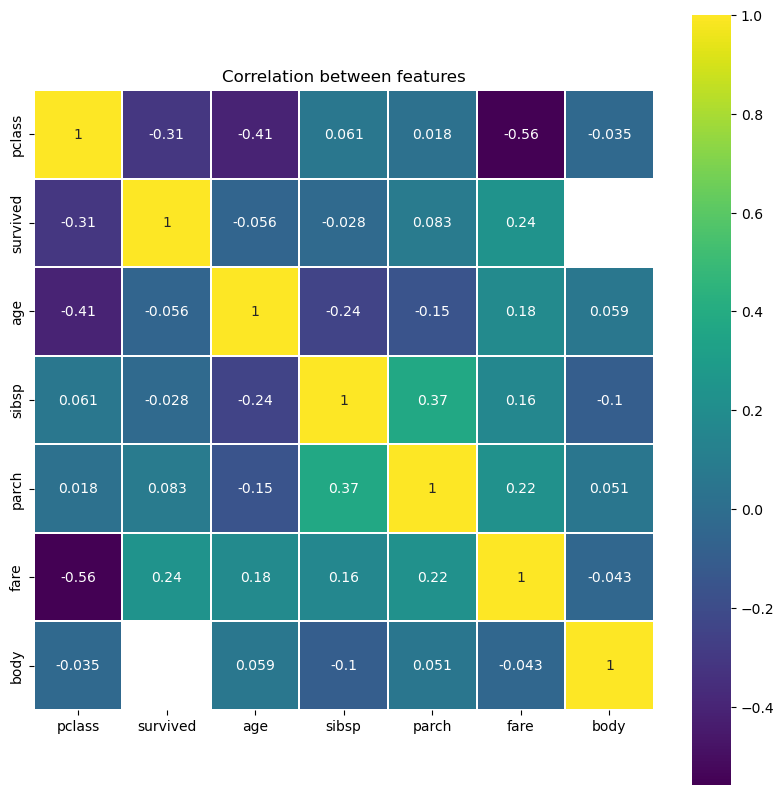

In [9]:
# 이런 상관계수는 seaborn의 heatmap과 함께 보면 시각적 효과가 좋다.
# annot: annotation(주석) 표시
# cmap : matplotlib의 color map name
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, 
            annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

* 상관계수는 두 데이터의 상관관계만 확인하는 것으로 인과관계로 생각하면 안된다.
* 선실 등급(pclass)이 낮을수록 생존률(survived)이 높아지는 관계에 있다는 것과
* 선실 등급(pclass)이 낮을수록 나이(age)가 많아진다.

# 나이별 구별 및 성별 생존율 확인하기

In [10]:
# age_cat(나이 등급) series 생성, 0~3세는 baby, 3~7는 children으로 나이 데이터를 등급화
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0, 3, 7, 15, 30, 60, 100],
                             include_lowest=True,
                             labels=['baby', 'children', 'teenage',
                                     'young', 'adult', 'old'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [11]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


* baby 등급에 가까운 연령대일수록 3등실에 많이 탑승했다.
* 위에서 raw_data.groupby('pclass').mean() 의 평균값으로 분석한 것과 다르게
* baby 등급일수록 생존율이 높다. 
* 평균의 함정이다. 데이터를 더 들여다 보자

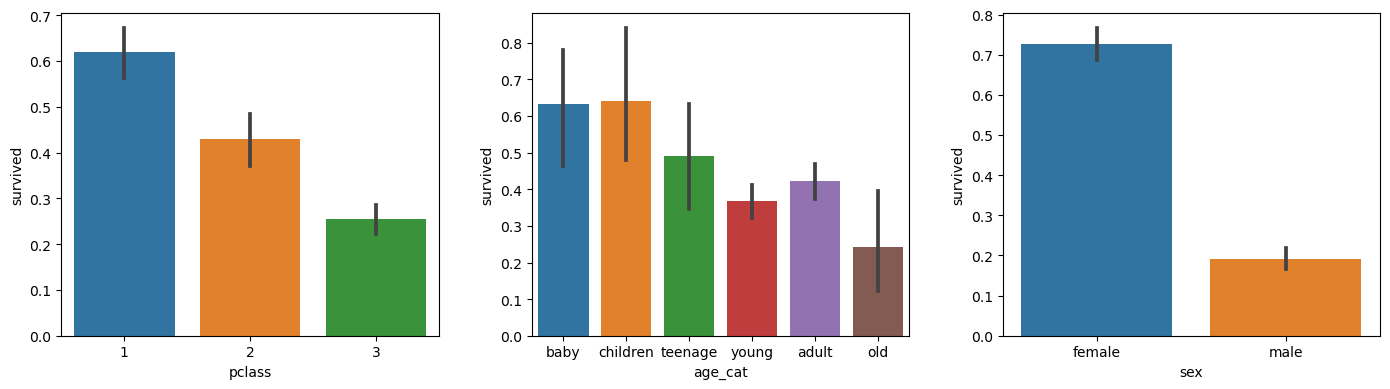

In [12]:
plt.figure(figsize=(14, 4))
plt.subplot(131) # = plt.subplot(1, 3, 1) : Three integers (*nrows*, *ncols*, *index*)
sns.barplot(data=raw_data, x='pclass', y='survived')
plt.subplot(132)
sns.barplot(data=raw_data, x='age_cat', y='survived')
plt.subplot(133)
sns.barplot(data=raw_data, x='sex', y='survived')
#plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5) # subplot의 간격설정
plt.tight_layout(h_pad=3, w_pad=3)  # subplot의 간격설정
plt.show()

* 1등실이 가장 생존율이 높아 보이지만, 나이가 어린 승객도 높은 생존율을 보인다. 특히 여성(female)의 생존율이 매우 높다는 것도 알 수 있다.

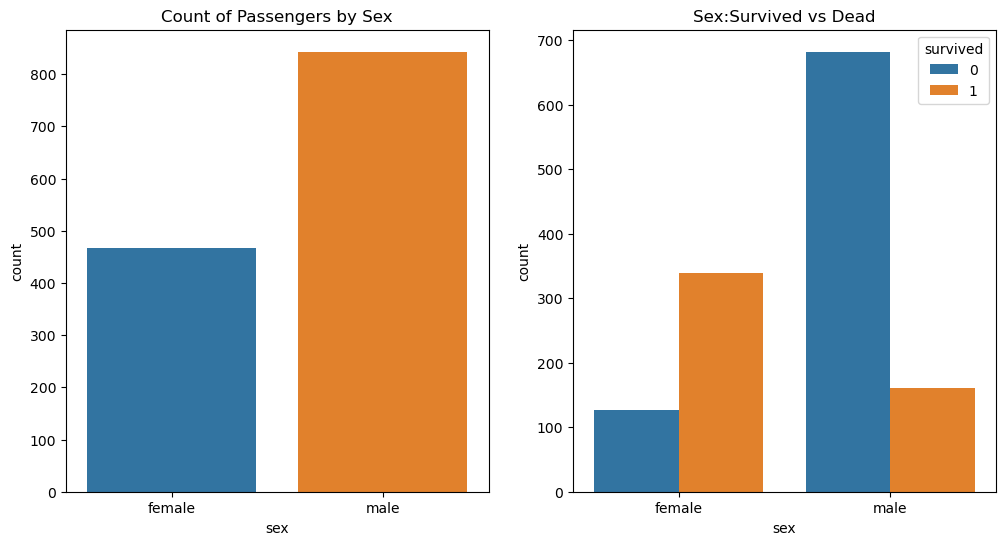

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=raw_data, x='sex', ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(data=raw_data, x='sex', hue='survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

* 여성과 남성의 생존 상황을 조금 더 상세히 보면
* 탑승객수는 여성이 480명정도로 850명쯤 되는 남성의 절반 정도이다.
* 그러나 생존 자체는 여성이 350명이 조금 안되는 수로 150명 정도 생존한 남성보다 훨씬 많다.

# 보트 탑승 승객의 생존율 확인하기

In [14]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,3,1,"Turja, Miss. Anna Sofia",female,18.0000,0,0,4138,9.8417,NaN,S,15,NaN,NaN,young
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN,old
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN,young
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN,adult


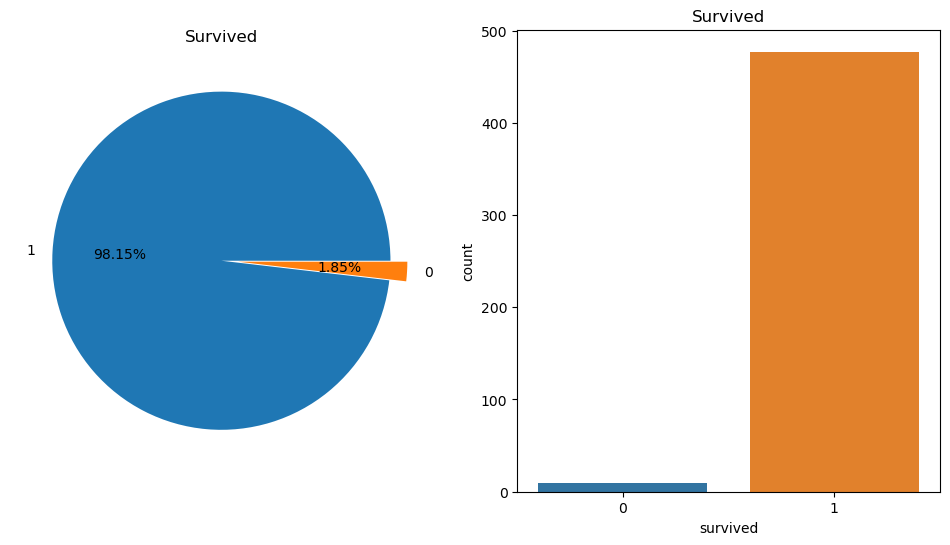

In [15]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.2f%%',
                                                   ax=ax[0]
                                                  )
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data=boat_survivors, x='survived', ax=ax[1])
ax[1].set_title('Survived')
# plt.tight_layout(h_pad=3, w_pad=5)  # subplot 간의 간격 설정
plt.show()

* 구명보트에 탑승한 사람들은 98.15% 생존하였다.
* 그래서 나중에 생존자를 예측하기 위한 모델을 만들 때는 이 항목은 특징으로 잡으면 안된다. 

# 귀족들의 생존율만 다시 조사하기

In [16]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [17]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [18]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [19]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [20]:
test = lambda x: x+2
test(2)

4

In [21]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [22]:
# title 컬럼을 만들고, 중복을 제거
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [23]:
pd.crosstab(raw_data['title'], raw_data['sex'])  
# 첫번째 지정된 컬럼을 인덱스로 하고, 두 번째 지정된 컬럼에 대한 개수를 알려준다.

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [24]:
# Mlle, Ms -> Miss, Mme -> Mrs로 변경
# Miss, Mrs, Mr를 제외한 나머지 호칭은 귀족으로 보고 rare라고 지정

raw_data['title'] = raw_data['title'].replace(['Mlle', 'Ms'], 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

rare = [ 'Master', 'Col', 'Dr', 'Major', 'Capt', 'Lady', 
        'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev']

for each in rare:
    raw_data['title'] = raw_data['title'].replace(each, 'rare')
    
raw_data['title'].unique()

array(['Miss', 'rare', 'Mr', 'Mrs'], dtype=object)

In [25]:
#
print(raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  rare  0.466667


* 일반 남성의 생존율은 16.25%, 귀족의 생존율은 46.67%로 여성의 생존율보다 낮다.
* 앞의 raw_data.groupby('pclass').mean() 결과를 보고 상류층만 살아남았다고 말하긴 어렵다.

# 학습을 위한 데이터 정리와 특징 선택하기

In [26]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [27]:
# female, male -> 0, 1로 변경
raw_data['sex'] = raw_data['sex'].map({'female': 0, 'male': 1})
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


* 이제 중요한 특징을 선택해야 한다. 확실한 것 sex, pclass은 특징으로 잡아야 한다.
* 그기에 sibsp(형제자매/배우자), parch(부모/자녀), fare(요금) 도 포함한다.
* 구명보드의 탑승 여부는 특징으로 잡으면 안된다. 98%가 survived로 되어 있었으므로 안됨.

In [28]:
# 특징을 수치형으로 변환
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [29]:
# 정보가 없는 NaN이 있는 컬럼 확인
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 155.0+ KB


In [30]:
# 정보가 없는 NaN은 제거
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.9+ KB


# 생존자 예측을 위한 모델 수립

## 데이터 가공(train data, test data)

In [31]:
# X값
train_pre_y = raw_data[['survived']]
train_pre_X = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
train_pre_X.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [32]:
train_pre_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1045 non-null   float64
 1   sex     1045 non-null   float64
 2   age     1045 non-null   float64
 3   sibsp   1045 non-null   float64
 4   parch   1045 non-null   float64
 5   fare    1045 non-null   float64
dtypes: float64(6)
memory usage: 57.1 KB


In [33]:
train_pre_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   float64
dtypes: float64(1)
memory usage: 16.3 KB


In [34]:
# 데이터를 훈련용과 검증용으로 나눔
from sklearn.model_selection import train_test_split

In [35]:
# 데이터를 훈련용과 검증용으로 나눈다.
# 전체 데이터의 10%를 test 데이터로 두고, 
# 훈련용 데이터 X_train와 훈련용 데이터의 라벨(train_pre_y=raw_data[['survived']]),
# 검정용 데이터 X_test와 라벨을 분리
# 나중에 훈련용 데이터로 모델을 수립하고, 그 모델을 검증용 데이터로 확인
X_train, X_test, y_train, y_test = train_test_split(train_pre_X,
                                                    train_pre_y,
                                                    test_size=0.1,
                                                    random_state=13)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [38]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [39]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [40]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [41]:
# 인덱스를 0부터 세팅
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)  # axis=1(column), 0(index), 'index'라는 컬럼을 삭제하므로 1

X_test = X_test.reset_index()
X_test = X_test.drop(columns=['index'])  # 이렇게도 사용한다.

y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'])

y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])

In [42]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792


## 모델 수립

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8117021276595745


* 훈련용 데이터에서 정확도는 81.2%

## 그래프로 확인

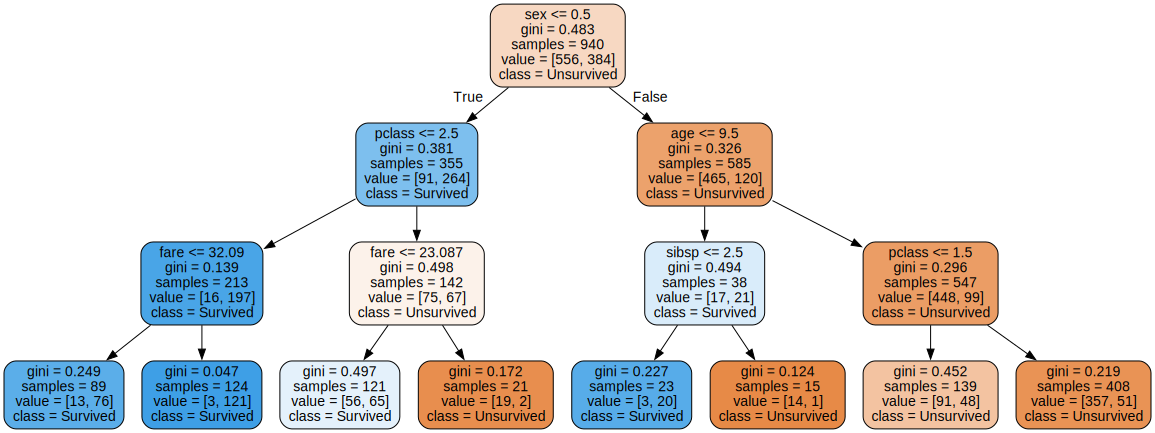

In [45]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="titanic.dot",
    feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
    class_names=['Unsurvived', 'Survived'],
    rounded=True,
    filled=True
)

import graphviz
with open('titanic.dot') as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
# dot.format = 'png'
# dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)  # 이미지 파일로 저장(생략가능) 
dot

* 한 단계씩 내려 오면서 왜  survived 라고 판별했는지 알 수 있다.
* 이것을 가지고 예측을 할 수 있다.

## 테스트 데이터로 예측하기

In [46]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  84.76190476190476


* 테스트 데이터를 가지고 정확도를 확인한 결과 84.76%가 나왔다. 
* 우리의 모델은 이것으로 쓸만하다고 생각할 수 있다.

# 생존자 예측; 디카프리오는 정말 생존할 수 없었을까?

* 영화 타이타닉의 주인공인 디카프리오와 윈슬렛의 정보를 이용하여 예측하기
* 디카프리오는 3등실 객실 남성, 19세, 부모, 형제, 자녀 없이 홀로 5달러에 탑승했다고 가정
* 윈슬렛은 1등실 탑승한 여성, 17세, 어머니, 약혼자와 함께 탑승

In [47]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [48]:
# winslet 생존율 확인
tree_clf.predict_proba([winslet])

C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.02419355, 0.97580645]])

In [49]:
# dicaprio 생존율 확인
tree_clf.predict_proba([dicaprio])

C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.875, 0.125]])

* 윈슬릿의 비생존/생존 비율, 디카프리오의 비생존/생존 비율이 각각 나타난다.
* 이것을 좀 더 잘 표현하기 위해 함수로 추가 작업

In [50]:
# 생존율이 높으면 생존율로, 낮으면 비생존율로 답변하도록 하였다.
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, ' ---> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  --->  0.875
Winslet  is  survived  --->  0.9758064516129032


C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kmans\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
